In [1]:
from brian2 import *
%matplotlib inline

In [15]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(30, 12))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=1)
    plot(ones(Nt), arange(Nt), 'ok', ms=1)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [44]:
start_scope()
# Params
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I) : 1
du/dt = a * (b*v - u) : 1
'''

t = 1*ms
# tau = 5*ms
# I = 0
s = 10
a = 0.0275
b = 0.490

c = -65
d = 8

n = 10
N = 500

# P = PoissonGroup(n, rates=1/tau)
G = NeuronGroup(N, eqs, threshold='v>30./1000', reset='v=c, u=u+d', 
                method='euler')
# S_P = Synapses(P, G, on_pre='v += s')
# S_P.connect()

S = Synapses(G, G)
P = n/N
S.connect(condition='i!=j', p=P)
assert(P == 0.02)

# S.delay = '2*ms'
S[:int(0.8 * N)].w = 's'
S[int(0.8 * N):].w = '-s'
visualise_connectivity(S)
suptitle('p = '+str(P))

WARNING    "i" is an internal variable of group "synapses_2", but also exists in the run namespace with the value 9. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


AttributeError: Synapses do not have a 'pre' pathway, do not know what 'delay' refers to.

In [42]:
M = SpikeMonitor(G)

output_rates = []
store()
for i in range(0, 10):
    restore()
    run(1*second)
    output_rates.append(M.num_spikes/(N*second))

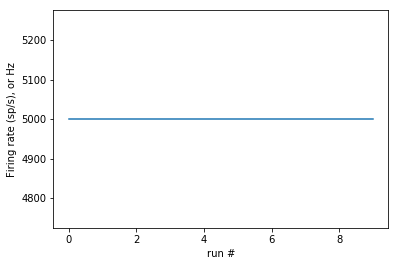

In [43]:
# print("firing rates: ", output_rates)
# plot(tau_range/ms, output_rates)
# xlabel(r'$\tau$ (ms)')
plot(output_rates)
xlabel('run #')
ylabel('Firing rate (sp/s), or Hz');